# Data Analysis of the Heart-Diseases-Project

## 1) Defining the problem statement.
### Predict whether a patient has a heart disease or not based on certain attributes.

## 2) Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3) Decide on Evaluation Metrics
### Decide what defines success?
* Achieving a certain amount of accuracy
* Limiting the number of false negatives or false positives

> Since, We have to do medical predictions they need to be very accurate and there must be very 
> less false negatives to prevent disease going undetected.
> Here we aim for around 95% accuracy.
## 4. Features

This is where you'll get different information about each of the features in your data. 
You can do this via doing your own research (such as looking at the links above) or 
by talking to a subject matter expert (someone who knows about the dataset).


## Data Dictionary

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Data Analysis involves

* Obtain data and see if it is in a format that can be used for predictions
* Check for missing values
* Find patterns in the data
* Check whether the features associated with the data make sense
* Convert non numeric or object values to numbers so that they can be fed to ML models
* Becoming a subject matter expert

> include above points
## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with. 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?




In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("./data/heart-disease.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.shape

(303, 14)

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
print(df["thal"].value_counts())
print(df["cp"].value_counts())

2    166
3    117
1     18
0      2
Name: thal, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


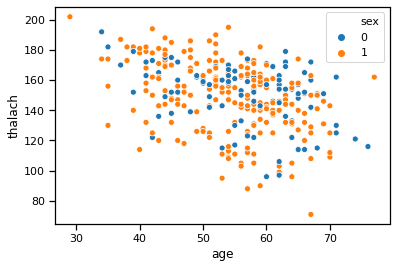

In [123]:
# sns.jointplot(x='age',y='thalach',data=df,kind='scatter',hue='sex')
sns.scatterplot(x='age',y='thalach',data=df,hue='sex')

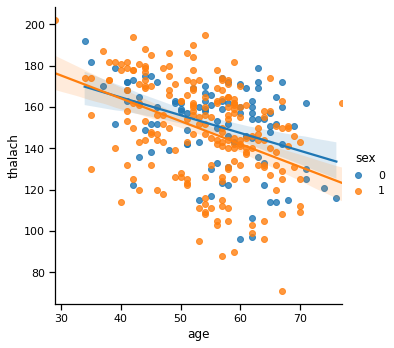

In [126]:
g = sns.lmplot(
    x="age", 
    y="thalach", 
    hue="sex", 
    data=df,  
    legend=True
)

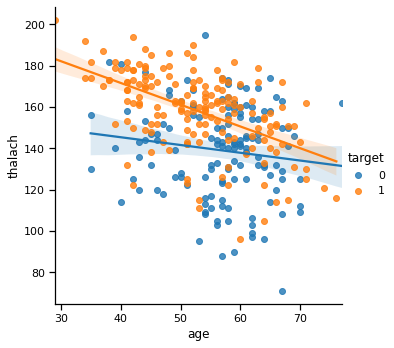

In [125]:
g = sns.lmplot(
    x="age", 
    y="thalach", 
    hue="target", 
    data=df,  
    legend=True
)

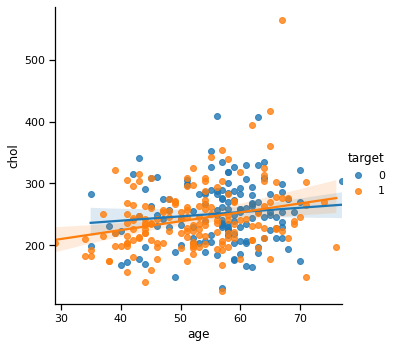

In [136]:
g = sns.lmplot(
    x="age", 
    y="chol", 
    hue="target", 
    data=df,  
    legend=True
)

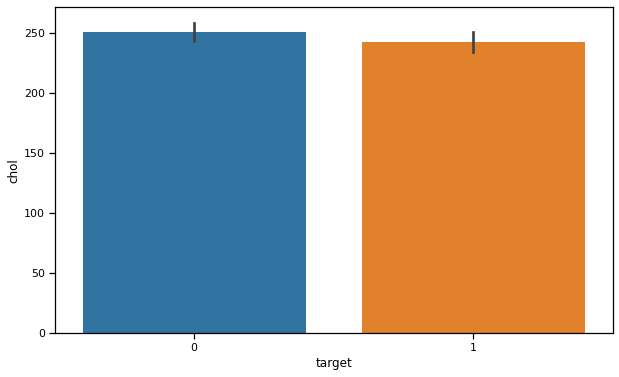

In [137]:
plt.figure(figsize=(10,6))
sns.barplot(x="target",y="chol",data=df)

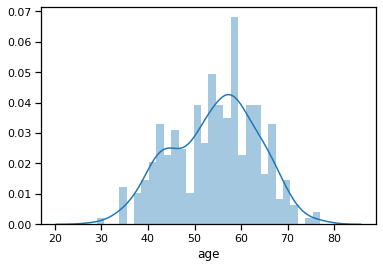

In [119]:
sns.distplot(df['age'],kde=True,bins=30)

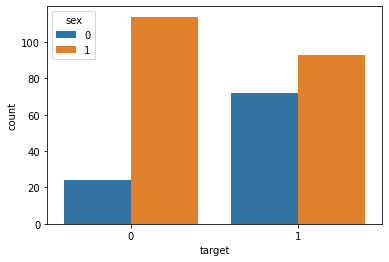

In [31]:
sns.countplot(x="target", data=df,hue="sex")

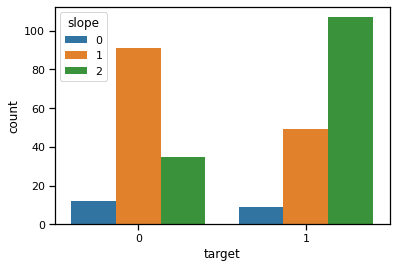

In [86]:
sns.countplot(x="target", data=df,hue="slope")

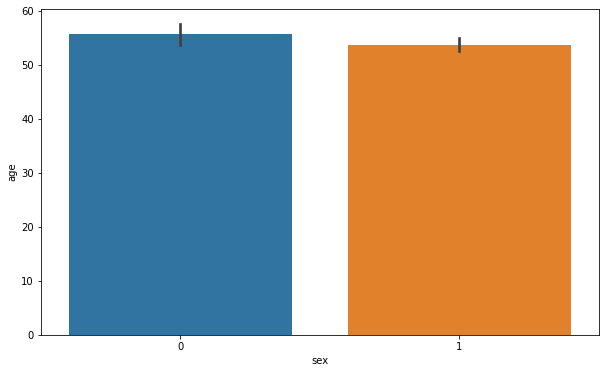

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x="sex",y="age",data=df)

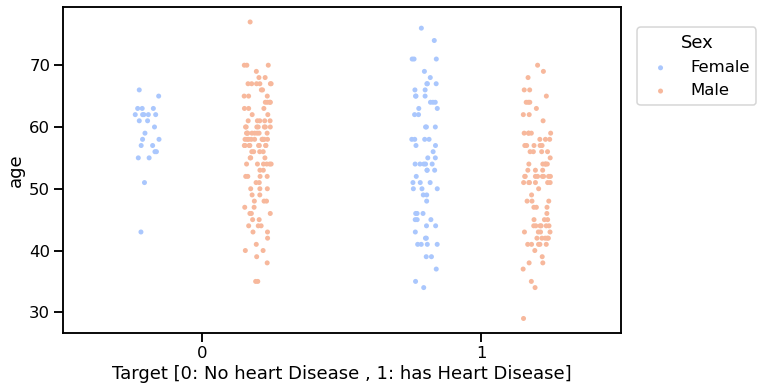

In [55]:
plt.figure(figsize=(10,6))
sns.set_context(context="talk", font_scale=1)
sns.stripplot(x = "target", y = "age", data = df, jitter = True, hue = "sex", dodge = True, palette = "coolwarm", lw=10)
plt.xlabel("Target [0: No heart Disease , 1: has Heart Disease]")
plt.legend(title="Sex", loc= (1.03,0.7), labels=["Female", "Male"])

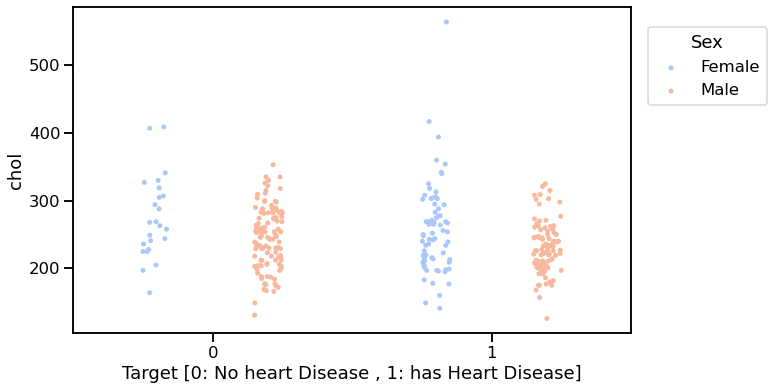

In [138]:
plt.figure(figsize=(10,6))
sns.set_context(context="talk", font_scale=1)
sns.stripplot(x = "target", y = "chol", data = df, jitter = True, hue = "sex", dodge = True, palette = "coolwarm", lw=10)
plt.xlabel("Target [0: No heart Disease , 1: has Heart Disease]")
plt.legend(title="Sex", loc= (1.03,0.7), labels=["Female", "Male"])

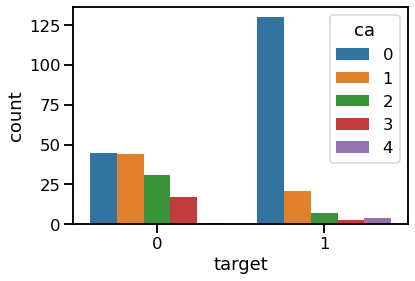

In [154]:
sns.countplot(x="target",data=df,hue="ca")

In [156]:
# chol_vs_target=df.pivot_table(values='chol',index='target',columns='sex',aggfunc='count')
# print(chol_vs_target)
pd.crosstab(index=df["target"],columns=df["chol"].count())

col_0,303
target,
0,138
1,165


In [67]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


sex    0   1
thal        
0      1   0
1      0   6
2     69  61
3      2  26


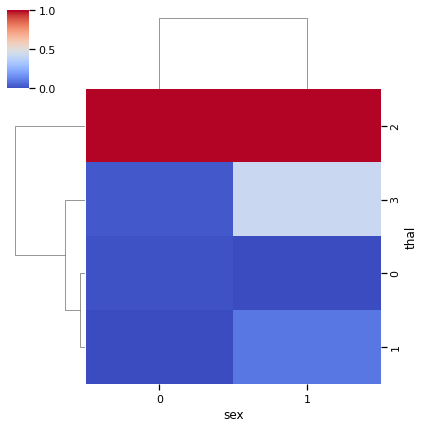

In [110]:
# plt.figure(figsize=(2,2))
sex_vs_thal=df[df["target"]==1].pivot_table(values='target',index='thal',columns='sex',aggfunc='count',fill_value=0)
print(sex_vs_thal)

sns.clustermap(sex_vs_thal,cmap='coolwarm',standard_scale=1,figsize=(6,6))

sex   0   1
cp         
0    18  21
1    16  25
2    34  35
3     4  12


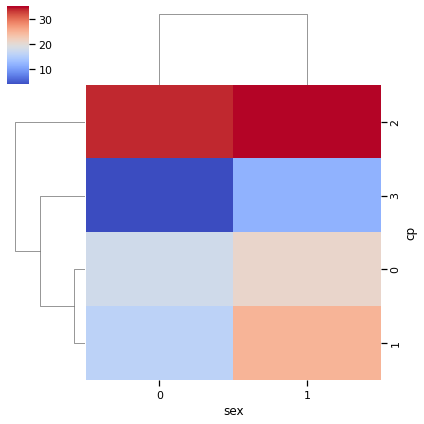

In [127]:
# plt.figure(figsize=(2,2))
sex_vs_cp=df[df["target"]==1].pivot_table(values='target',index='cp',columns='sex',aggfunc='count')
print(sex_vs_cp)

sns.clustermap(sex_vs_cp,cmap='coolwarm',figsize=(6,6))

sex   0   1
cp         
0    18  21
1    16  25
2    34  35
3     4  12


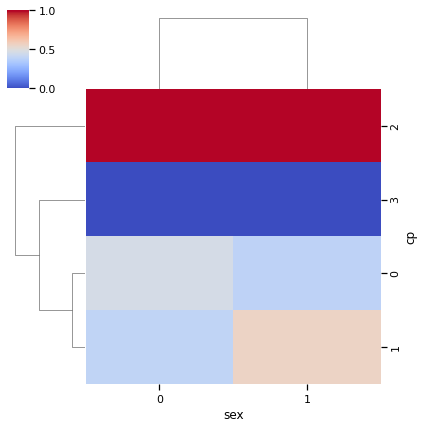

In [128]:
# plt.figure(figsize=(2,2))
sex_vs_cp=df[df["target"]==1].pivot_table(values='target',index='cp',columns='sex',aggfunc='count')
print(sex_vs_cp)

sns.clustermap(sex_vs_cp,cmap='coolwarm',standard_scale=1,figsize=(6,6))

sex              0           1
target                        
0       274.958333  246.061404
1       256.750000  230.989247


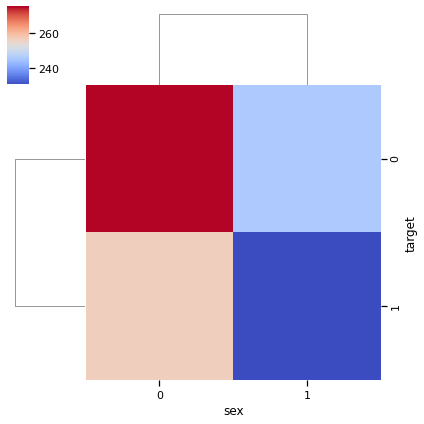

In [106]:
# plt.figure(figsize=(2,2))
sex_vs_target=df.pivot_table(values='chol',index='target',columns='sex',aggfunc='mean')
print(sex_vs_target)

sns.clustermap(sex_vs_target,cmap='coolwarm',figsize=(6,6))

In [101]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


sex              0           1
target                        
0       142.416667  138.403509
1       154.027778  161.903226


C:\Users\shubh\Desktop\ML_ZeroToMastery\Heart-Disease-Project\env\lib\site-packages\seaborn\matrix.py:712: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


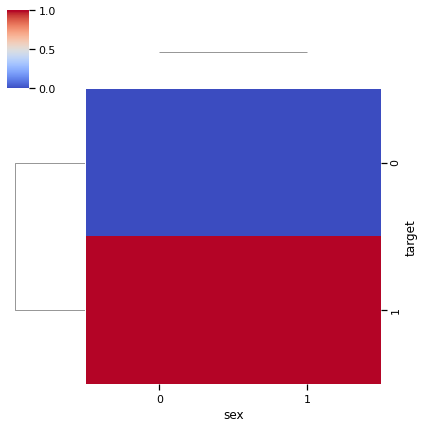

In [105]:
# plt.figure(figsize=(2,2))
sex_vs_target_onthalac=df.pivot_table(values='thalach',index='target',columns='sex',aggfunc='mean')
print(sex_vs_target_onthalac)

sns.clustermap(sex_vs_target_onthalac,cmap='coolwarm',standard_scale=1,figsize=(6,6))

sex            0         1
target                    
0       1.841667  1.531579
1       0.554167  0.605376


C:\Users\shubh\Desktop\ML_ZeroToMastery\Heart-Disease-Project\env\lib\site-packages\seaborn\matrix.py:712: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


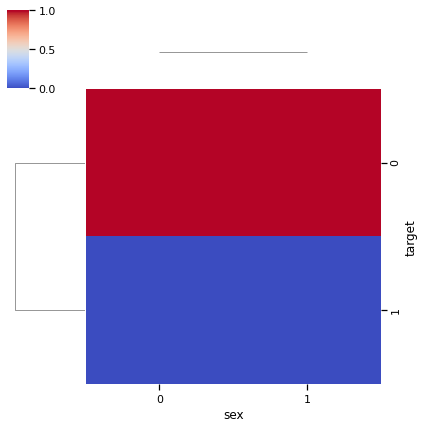

In [131]:
sex_vs_target_onthalac=df.pivot_table(values='oldpeak',index='target',columns='sex',aggfunc='mean')
print(sex_vs_target_onthalac)

sns.clustermap(sex_vs_target_onthalac,cmap='coolwarm',figsize=(6,6),standard_scale=1)

sex       0   1
restecg        
0        31  37
1        40  56
2         1   0


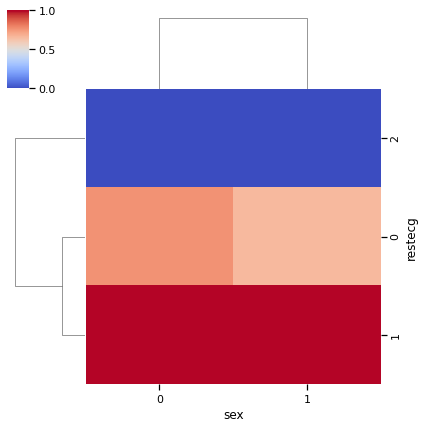

In [117]:
sex_vs_restecg=df[df["target"]==1].pivot_table(values='target',index='restecg',columns='sex',aggfunc='count',fill_value=0)
print(sex_vs_restecg)

sns.clustermap(sex_vs_restecg,cmap='coolwarm',standard_scale=1,figsize=(6,6))

sex     0   1
slope        
0       2   7
1      26  23
2      44  63


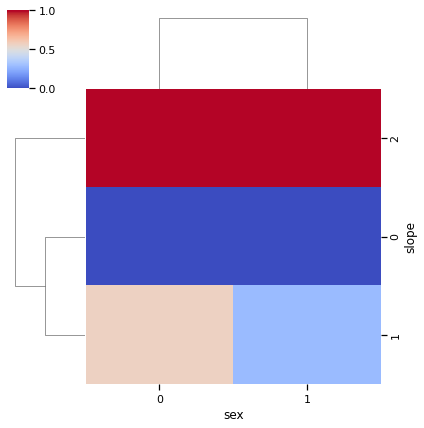

In [118]:
sex_vs_slope=df[df["target"]==1].pivot_table(values='target',index='slope',columns='sex',aggfunc='count')
print(sex_vs_slope)

sns.clustermap(sex_vs_slope,cmap='coolwarm',standard_scale=1,figsize=(6,6))

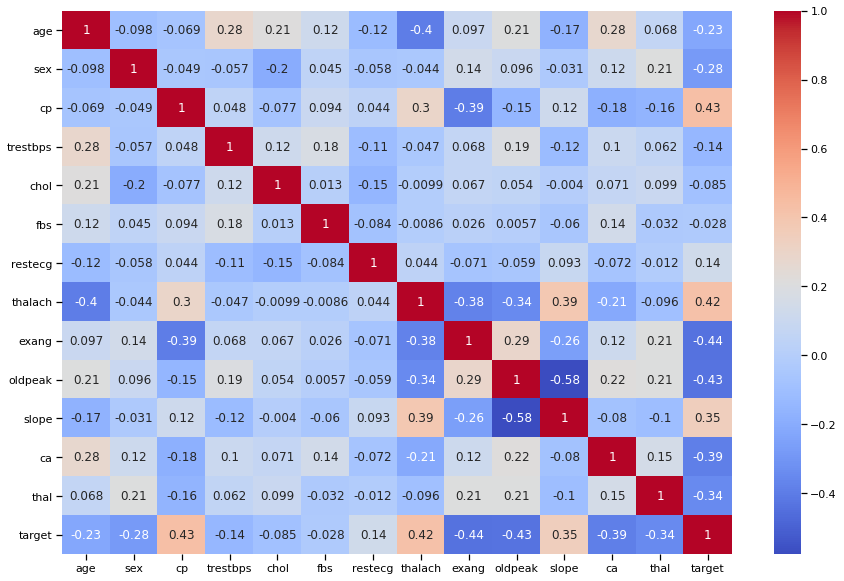

In [61]:
sns.set_context(context="notebook")
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)